In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [ ]:
df =pd.read_csv('Student_Performance.csv')

# CONCLUSION: Successfully loaded the student performance dataset into a pandas DataFrame for analysis

In [ ]:
df.head()

# CONCLUSION: Displayed first 5 rows to understand the dataset structure and column types

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.info()

# CONCLUSION: Examined dataset structure, data types, and memory usage to identify any missing values or type conversions needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.describe()

# CONCLUSION: Generated statistical summary (mean, std, min, max, quartiles) to understand data distribution and detect outliers

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df.columns

# CONCLUSION: Listed all column names to understand available features for the machine learning model

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
print(type('Extracurricular Activities'))

# CONCLUSION: Checked data type of the string literal (not the column) - this shows it's a string type

<class 'str'>


In [ ]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes':1,"No":0})

# CONCLUSION: Converted categorical data (Yes/No) to numerical values (1/0) for machine learning compatibility

C:\Users\Rahul\AppData\Local\Temp\ipykernel_20644\4287676360.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes':1,"No":0})


In [ ]:
print(type('Extracurricular Activities'))

# CONCLUSION: Double-checked the string type again (redundant check - the column values are now numeric but this still checks the string literal)

<class 'str'>


In [ ]:
df.info()

# CONCLUSION: Verified that the 'Extracurricular Activities' column is now properly encoded as numerical data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [ ]:
y = df['Performance Index']
x = df.drop(columns='Performance Index')

# CONCLUSION: Separated target variable (Performance Index) from features for supervised learning

In [ ]:
df.duplicated().any()

# CONCLUSION: Checked for duplicate rows in the dataset to ensure data quality

np.True_

In [ ]:
df = df.drop_duplicates()

# CONCLUSION: Removed any duplicate rows to clean the dataset and avoid bias in model training

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=42)
x_train,x_test,y_train,y_test

# CONCLUSION: Split data into 80% training and 20% testing sets with fixed random state for reproducible results

(      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
 9254              5               49                           0            7   
 1561              2               48                           1            7   
 1670              2               81                           0            7   
 6087              2               46                           0            6   
 6669              8               47                           0            9   
 ...             ...              ...                         ...          ...   
 5734              8               50                           1            6   
 5191              4               68                           0            9   
 5390              9               48                           0            7   
 860               1               47                           0            9   
 7270              2               46                           0            6   
 
       Sample 

In [ ]:
model = LinearRegression()

# CONCLUSION: Created a Linear Regression model instance ready for training

In [ ]:
# fit or train the model

model.fit(x_train,y_train)

# CONCLUSION: Successfully trained the Linear Regression model on the training data to learn feature-target relationships

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
model.intercept_

# CONCLUSION: Retrieved the y-intercept (bias term) of the linear regression equation

np.float64(-33.921946215556126)

In [ ]:
model.coef_

# CONCLUSION: Retrieved the coefficients (slopes) for each feature showing their impact on Performance Index

array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

In [ ]:
y_pred = model.predict(x_test)
y_pred

# CONCLUSION: Generated predictions on test data to evaluate model performance

array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301], shape=(2000,))

In [ ]:
y_test - y_pred

# CONCLUSION: Calculated residuals (prediction errors) to understand how well the model fits the test data

6252   -3.711854
4684   -2.615513
1731   -1.903145
4742   -3.289767
4521   -2.004570
          ...   
6412   -1.886280
8285    3.301975
7853   -0.793420
1095    1.656726
6929    1.057377
Name: Performance Index, Length: 2000, dtype: float64

In [ ]:
x_test

# CONCLUSION: Displayed test features to verify the data used for making predictions

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6252,5,69,0,8,2
4684,2,46,1,4,8
1731,7,56,1,7,5
4742,6,42,1,8,5
4521,7,53,0,4,6
...,...,...,...,...,...
6412,2,70,0,7,3
8285,4,79,0,9,3
7853,2,40,1,7,2
1095,3,83,0,7,5


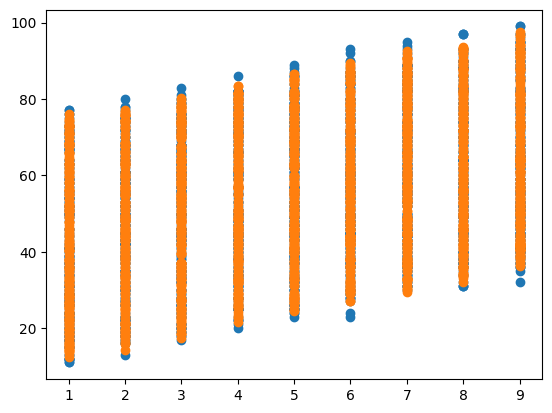

In [ ]:
plt.scatter(x_test["Hours Studied"],y_test)
plt.scatter(x_test["Hours Studied"],y_pred)

# CONCLUSION: Plotted real vs predicted scores for 'Hours Studied' to see how well the model matches the actual results

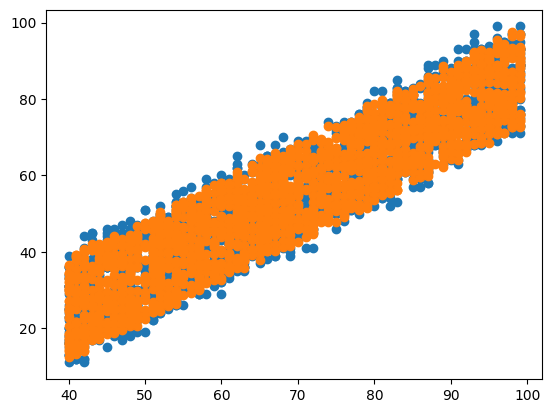

In [ ]:
plt.scatter(x_test["Previous Scores"],y_test)
plt.scatter(x_test["Previous Scores"],y_pred)

# CONCLUSION: Visualized actual vs predicted values for 'Previous Scores' to evaluate how well this feature predicts performance

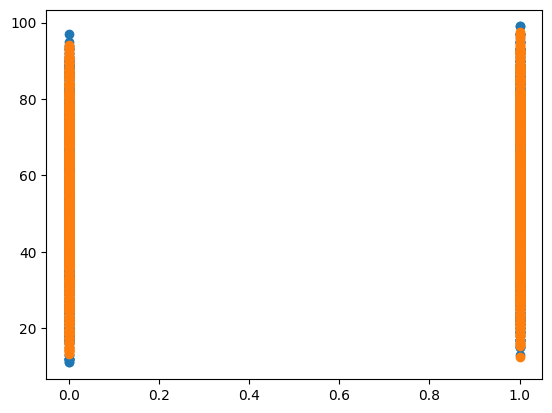

In [ ]:
plt.scatter(x_test["Extracurricular Activities"],y_test)
plt.scatter(x_test["Extracurricular Activities"],y_pred)

# CONCLUSION: Visualized impact of extracurricular activities (0/1) on performance predictions vs actual values

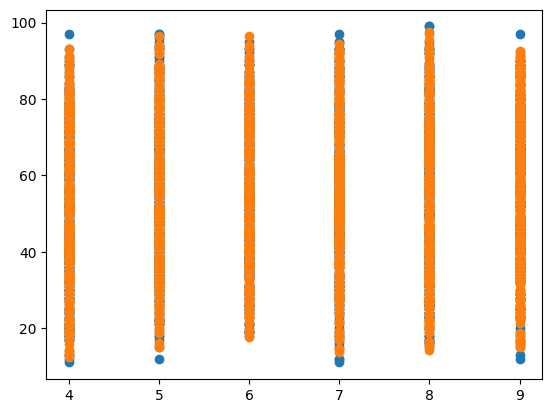

In [ ]:
plt.scatter(x_test["Sleep Hours"],y_test)
plt.scatter(x_test["Sleep Hours"],y_pred)

# CONCLUSION: Analyzed relationship between sleep hours and performance through actual vs predicted value comparison

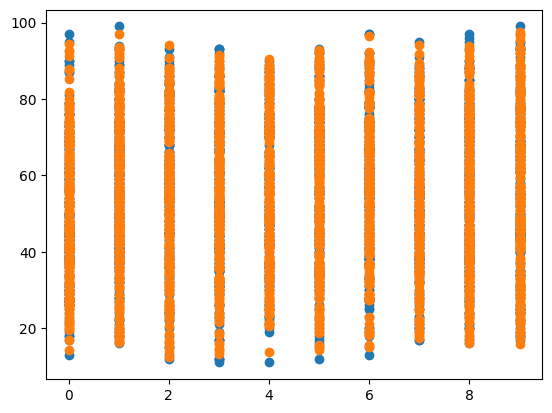

In [ ]:
plt.scatter(x_test["Sample Question Papers Practiced"],y_test)
plt.scatter(x_test["Sample Question Papers Practiced"],y_pred)

# CONCLUSION: Evaluated how well the model predicts performance based on practice papers by comparing actual vs predicted values